In [46]:
import pandas as pd
import numpy as np
import nrrd
import SimpleITK as sitk

In [47]:
import matplotlib.pyplot as plt

In [56]:
img = np.load("/Users/jmarsill/Downloads/radcure_ensemble_test/input_6_FULL.npy")
targ = np.load("/Users/jmarsill/Downloads/radcure_ensemble_test/targ_6_FULL.npy")
out = np.load("/Users/jmarsill/Downloads/radcure_ensemble_test/outs_6_FULL.npy")

In [57]:
shape = img.shape

In [58]:
img = img[:,shape[1]//7:shape[1]-int(shape[1]/2.4),int(shape[1]/3.7):shape[1]-int(shape[1]/3.5)]
targ = targ[:,shape[1]//7:shape[1]-int(shape[1]/2.4),int(shape[1]/3.7):shape[1]-int(shape[1]/3.5)]
out = out[:,shape[1]//7:shape[1]-int(shape[1]/2.4),int(shape[1]/3.7):shape[1]-int(shape[1]/3.5)]

In [74]:
slices = [18*3, 22*3, 28*3, 32*3, 38*3, 42*3]
fig = plt.figure(figsize=(130,65))
for i, val in enumerate(slices):
    
    slice_ = img[val]

    ax1 = fig.add_subplot(3,6,1+i)
    targ_ = np.round(targ[val])
    targed = np.ma.masked_where(targ_ == 0, targ_)
    ax1.imshow(np.round(slice_), cmap='gray', interpolation='none')
    ax1.imshow(targed*2, alpha=0.8, cmap='jet', interpolation='none')
    # ax1.set_title("Ground Truth")
    ax1.axis('off')

    ax2 = fig.add_subplot(3,6,7+i)
    out_ = np.round(out[val])
    outed = np.ma.masked_where(out_ == 0, out_)
    ax2.imshow(np.round(slice_), cmap='gray', interpolation='none')
    ax2.imshow(outed*3, alpha=0.8, cmap='jet', interpolation='none')
    # ax2.set_title("Prediction")
    ax2.axis('off')

    ax3 = fig.add_subplot(3,6,13+i)
    diff = np.round(targ_ - out_)
    diffed = np.ma.masked_where(diff == 0, diff)
    ax3.imshow(np.round(slice_), cmap='gray', interpolation='none')
    ax3.imshow(diffed*4, alpha=0.8, cmap='rainbow', interpolation='none')
    # ax3.set_title("Difference")
    ax3.axis('off')
    print(i)

plt.show()

0
1
2
3
4
5


In [75]:
fig.savefig(f'/Users/jmarsill/Downloads/radcure_ensemble_test/patient{6}_cropped.png', dpi=300)

0
1


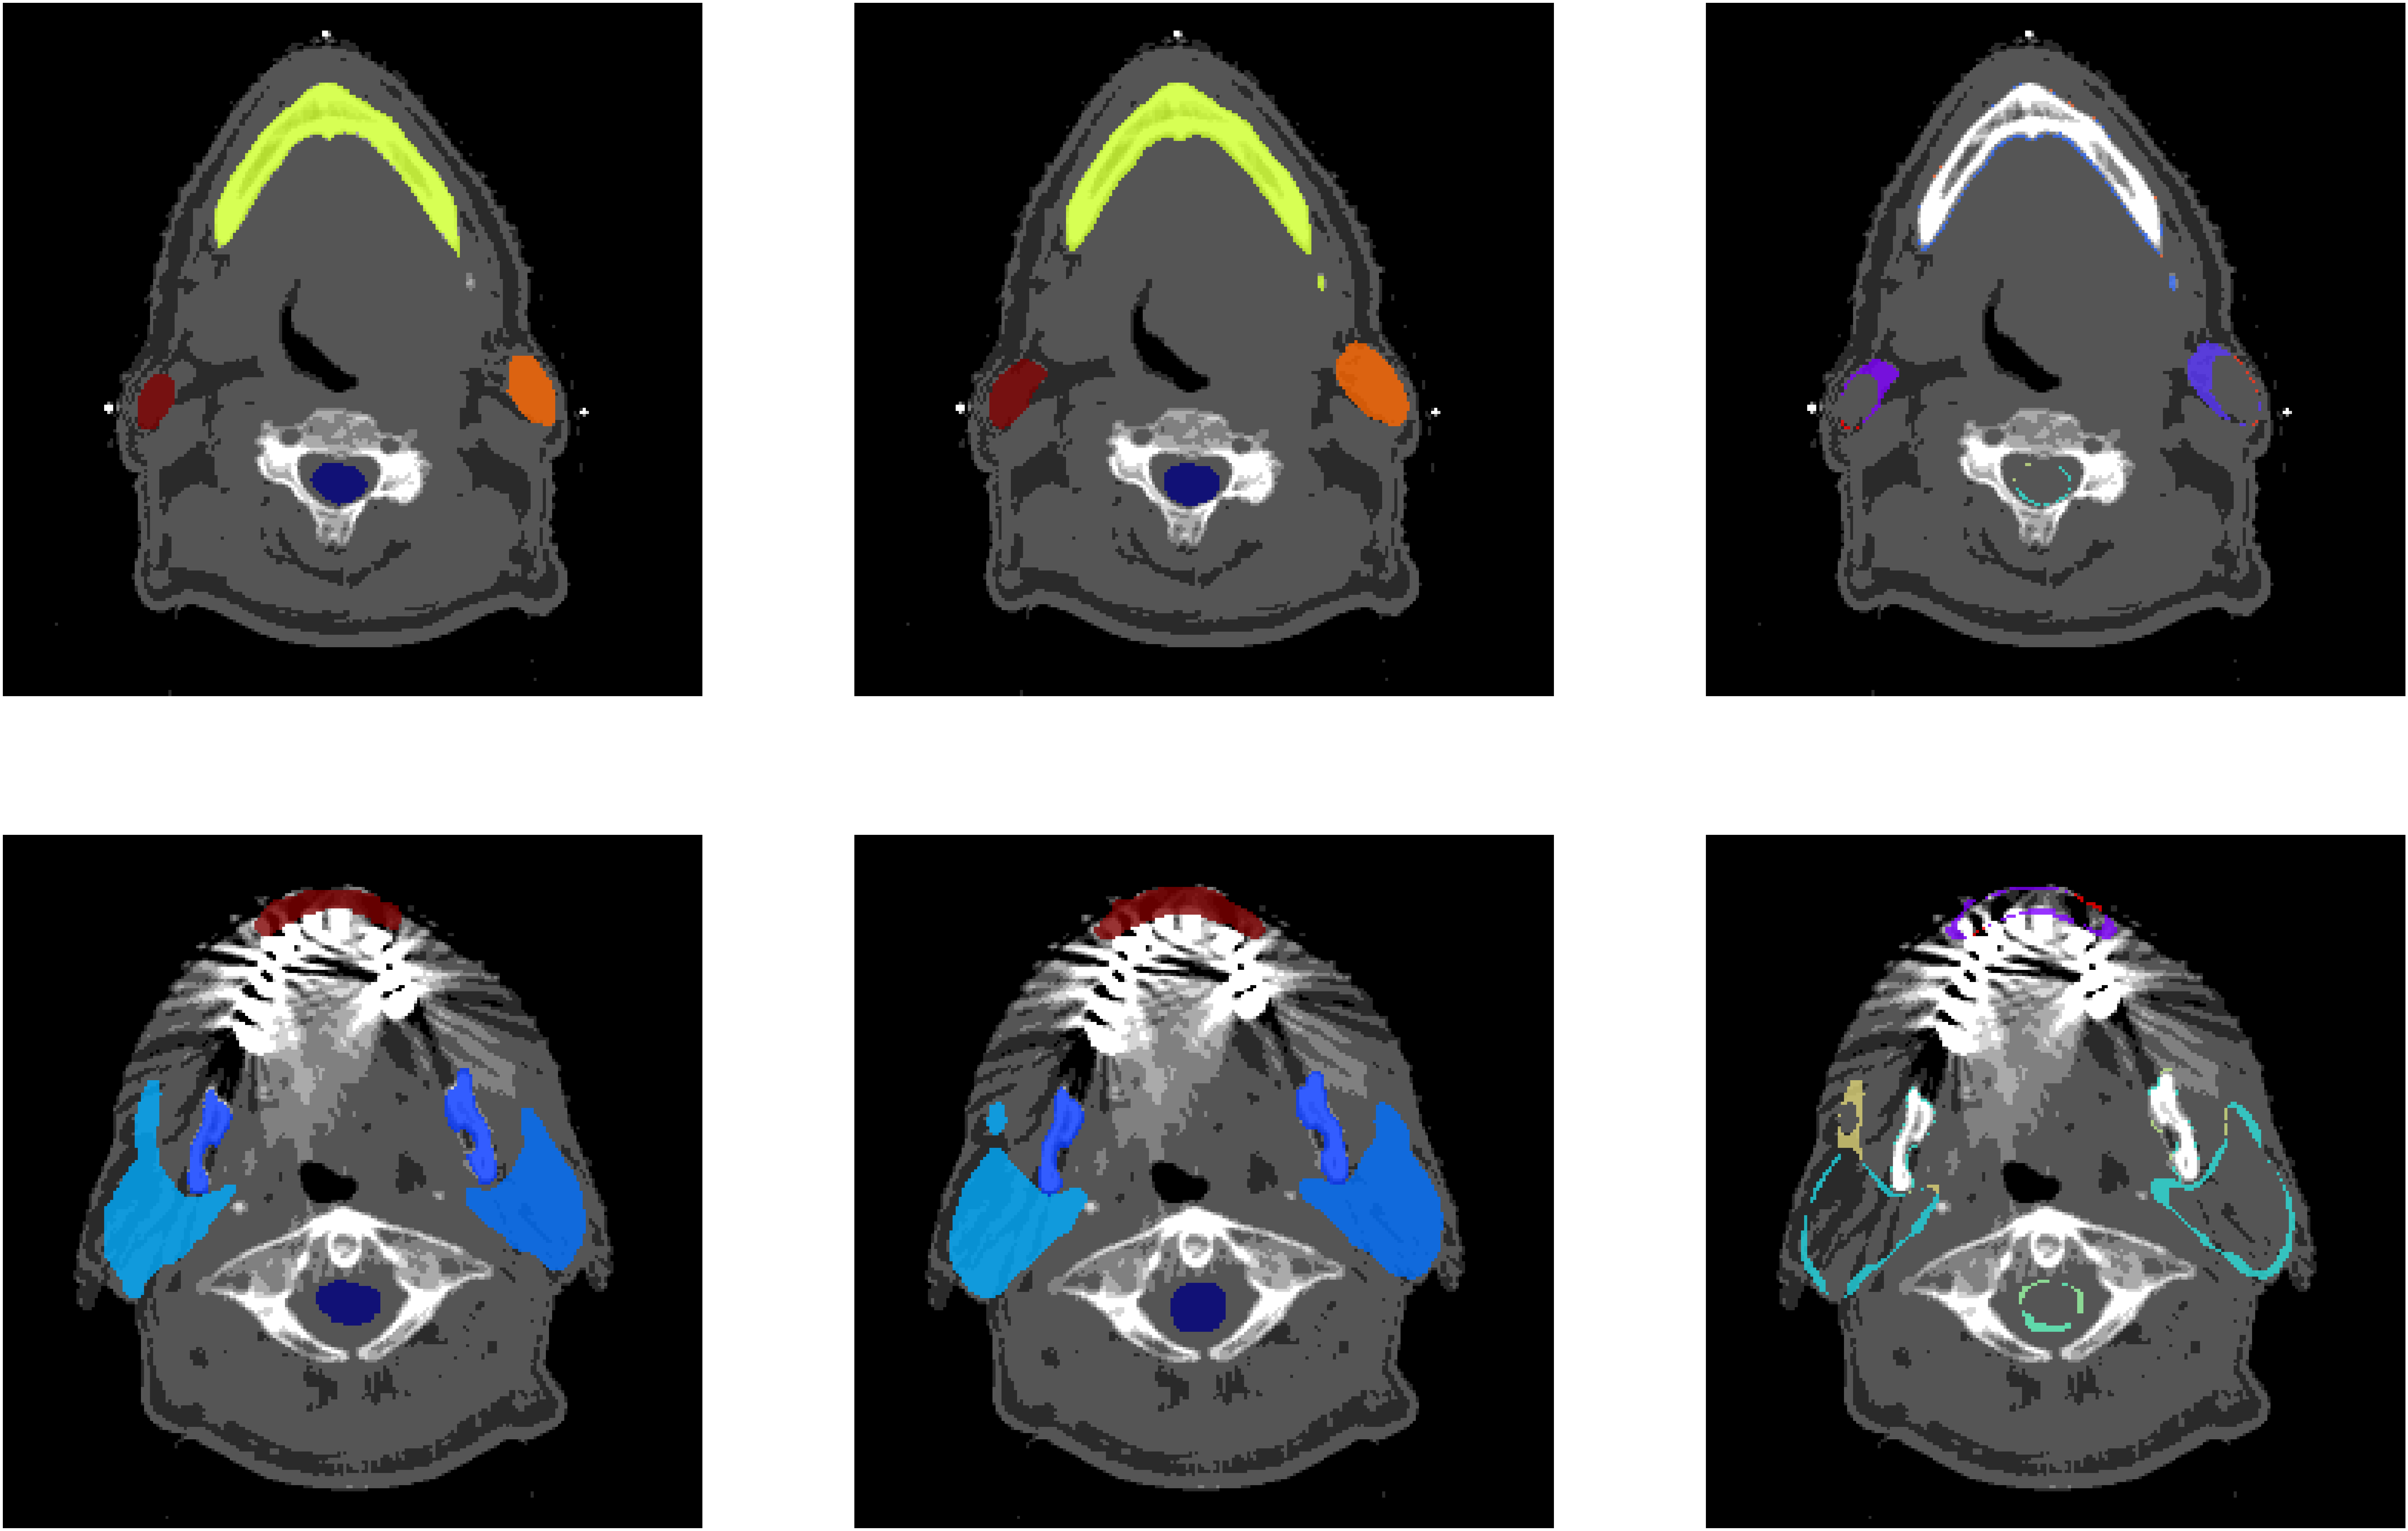

In [65]:
slices = [32*3, 38*3]
par = [0,3]
fig = plt.figure(figsize=(110,70))
for i, val in enumerate(slices):
    
    slice_ = img[val]

    ax1 = fig.add_subplot(2,3,par[i]+1)
    targ_ = np.round(targ[val])
    targed = np.ma.masked_where(targ_ == 0, targ_)
    ax1.imshow(np.round(slice_), cmap='gray', interpolation='none')
    ax1.imshow(targed*2, alpha=0.8, cmap='jet', interpolation='none')
    # ax1.set_title("Ground Truth")
    ax1.axis('off')

    ax2 = fig.add_subplot(2,3,par[i]+2)
    out_ = np.round(out[val])
    outed = np.ma.masked_where(out_ == 0, out_)
    ax2.imshow(np.round(slice_), cmap='gray', interpolation='none')
    ax2.imshow(outed*3, alpha=0.8, cmap='jet', interpolation='none')
    # ax2.set_title("Prediction")
    ax2.axis('off')

    ax3 = fig.add_subplot(2,3,par[i]+3)
    diff = np.round(targ_ - out_)
    diffed = np.ma.masked_where(diff == 0, diff)
    ax3.imshow(np.round(slice_), cmap='gray', interpolation='none')
    ax3.imshow(diffed*4, alpha=0.8, cmap='rainbow', interpolation='none')
    # ax3.set_title("Difference")
    ax3.axis('off')
    print(i)

plt.show()

fig.savefig(f'/Users/jmarsill/Downloads/radcure_ensemble_test/patient{6}_zoom.png', dpi=300)

In [87]:
38*3

114

In [66]:
fig.savefig(f'/Users/jmarsill/Downloads/radcure_ensemble_test/patient{6}_zoom.png', dpi=300)

In [97]:
val = 114
slice_ = img[val]
targ_ = np.round(targ[val])

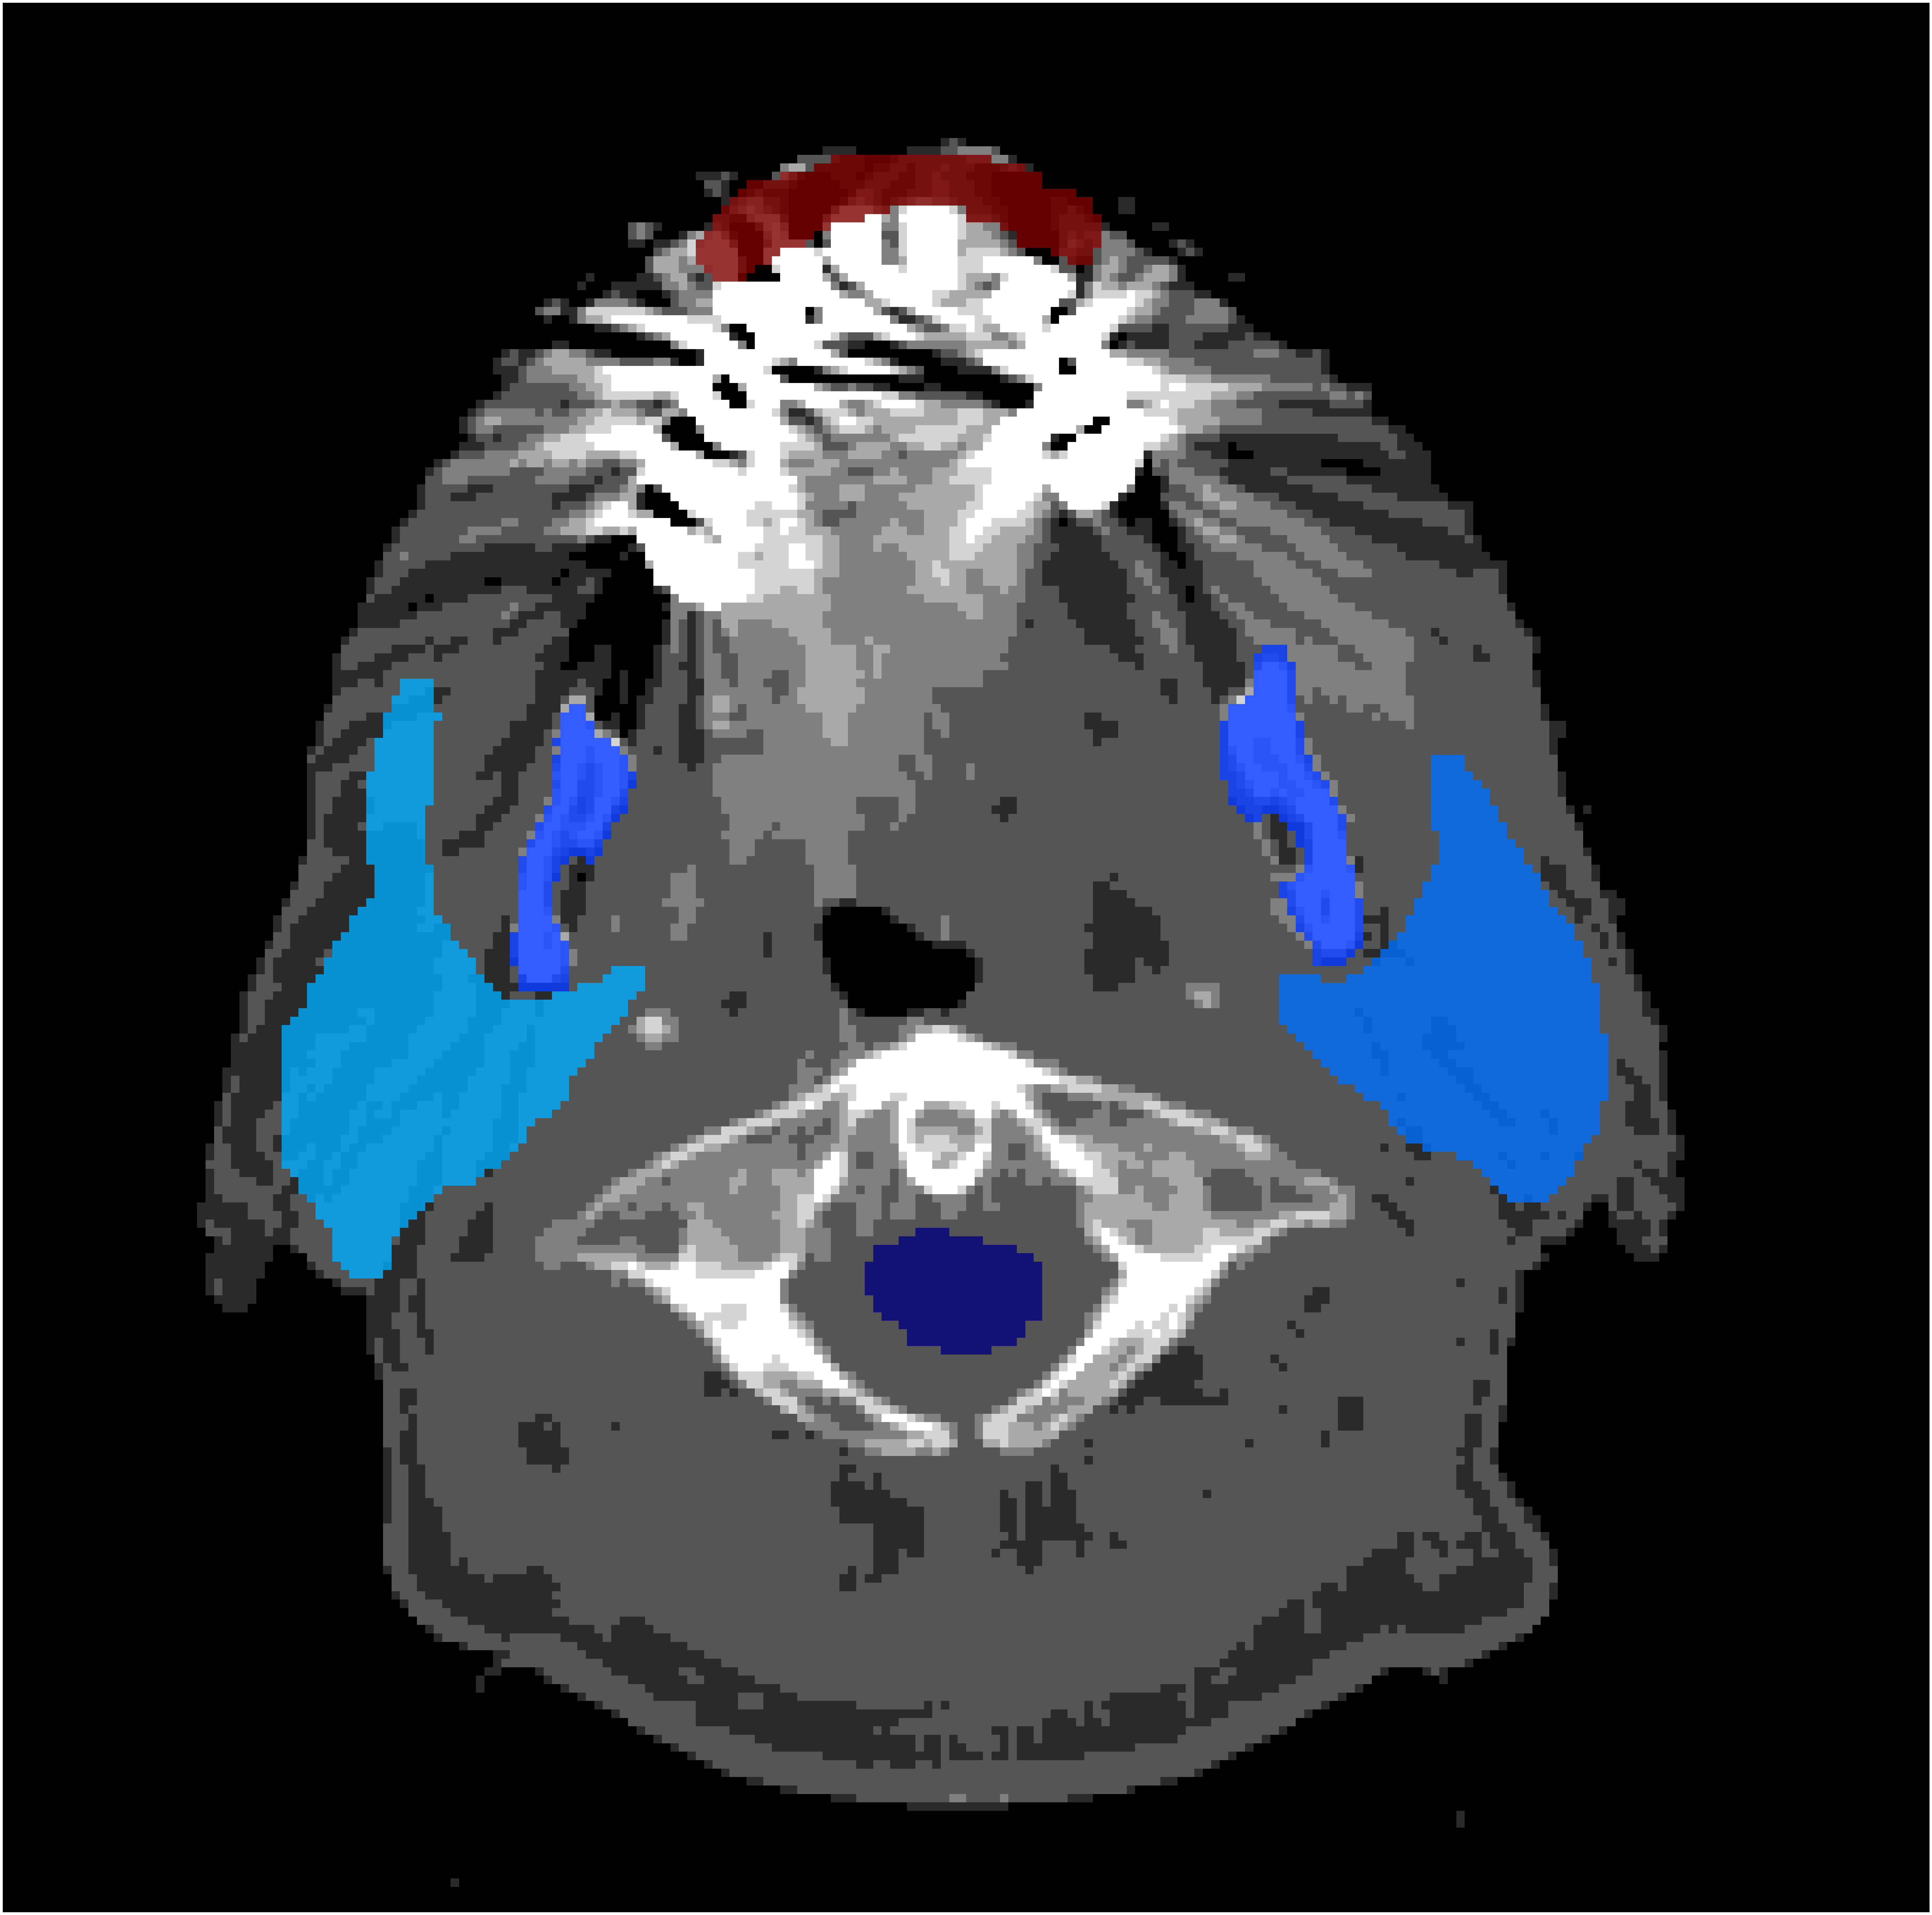

In [98]:
plt.figure(figsize=(100,90))
targed = np.ma.masked_where(targ_ == 0, targ_)
plt.imshow(np.round(slice_), cmap='gray', interpolation='none')
plt.imshow(targed*2, alpha=0.8, cmap='jet', interpolation='none')
# ax1.set_title("Ground Truth")
plt.axis('off')
plt.savefig(f'/Users/jmarsill/Downloads/radcure_ensemble_test/patient{6}_large_AI_view2.png', dpi=200)
# plt.show()

(-0.5, 227.5, 225.5, -0.5)

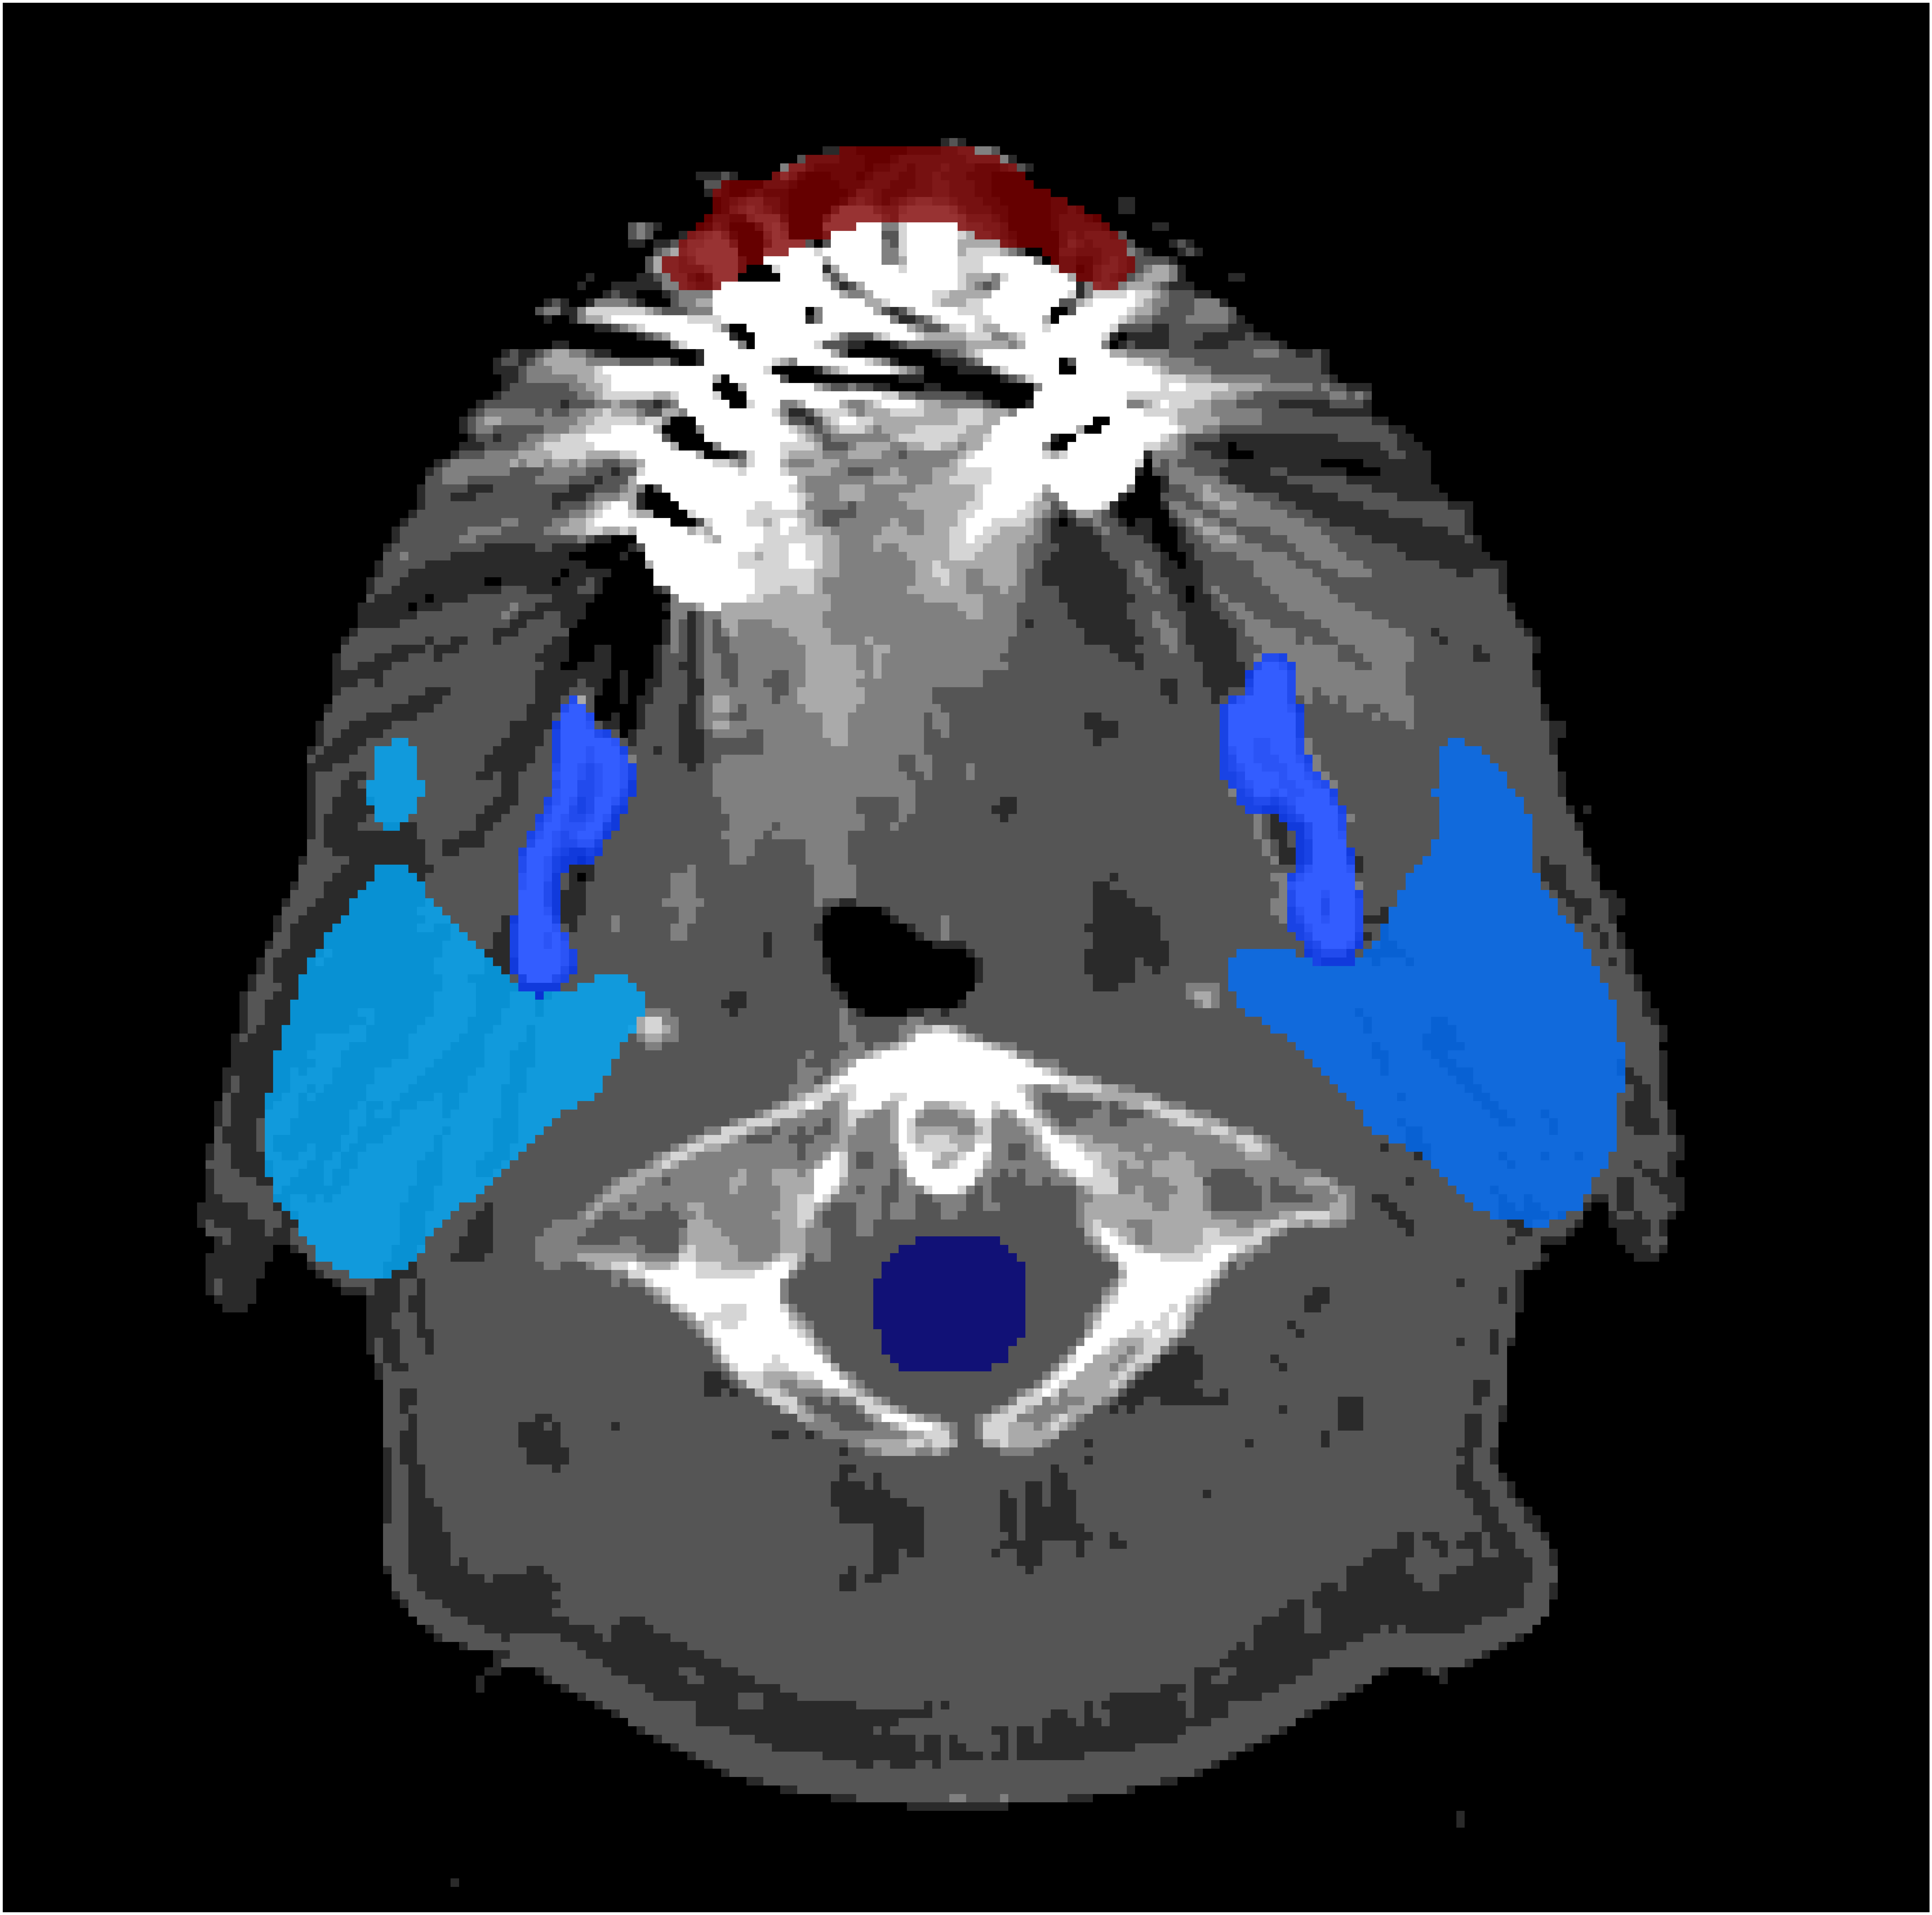

In [99]:
plt.figure(figsize=(100,90))
out_ = np.round(out[val])
outed = np.ma.masked_where(out_ == 0, out_)
plt.imshow(np.round(slice_), cmap='gray', interpolation='none')
plt.imshow(outed*3, alpha=0.8, cmap='jet', interpolation='none')
# ax2.set_title("Prediction")
plt.savefig(f'/Users/jmarsill/Downloads/radcure_ensemble_test/patient{6}_large_HUMAN_view2.png', dpi=200)
plt.axis('off')

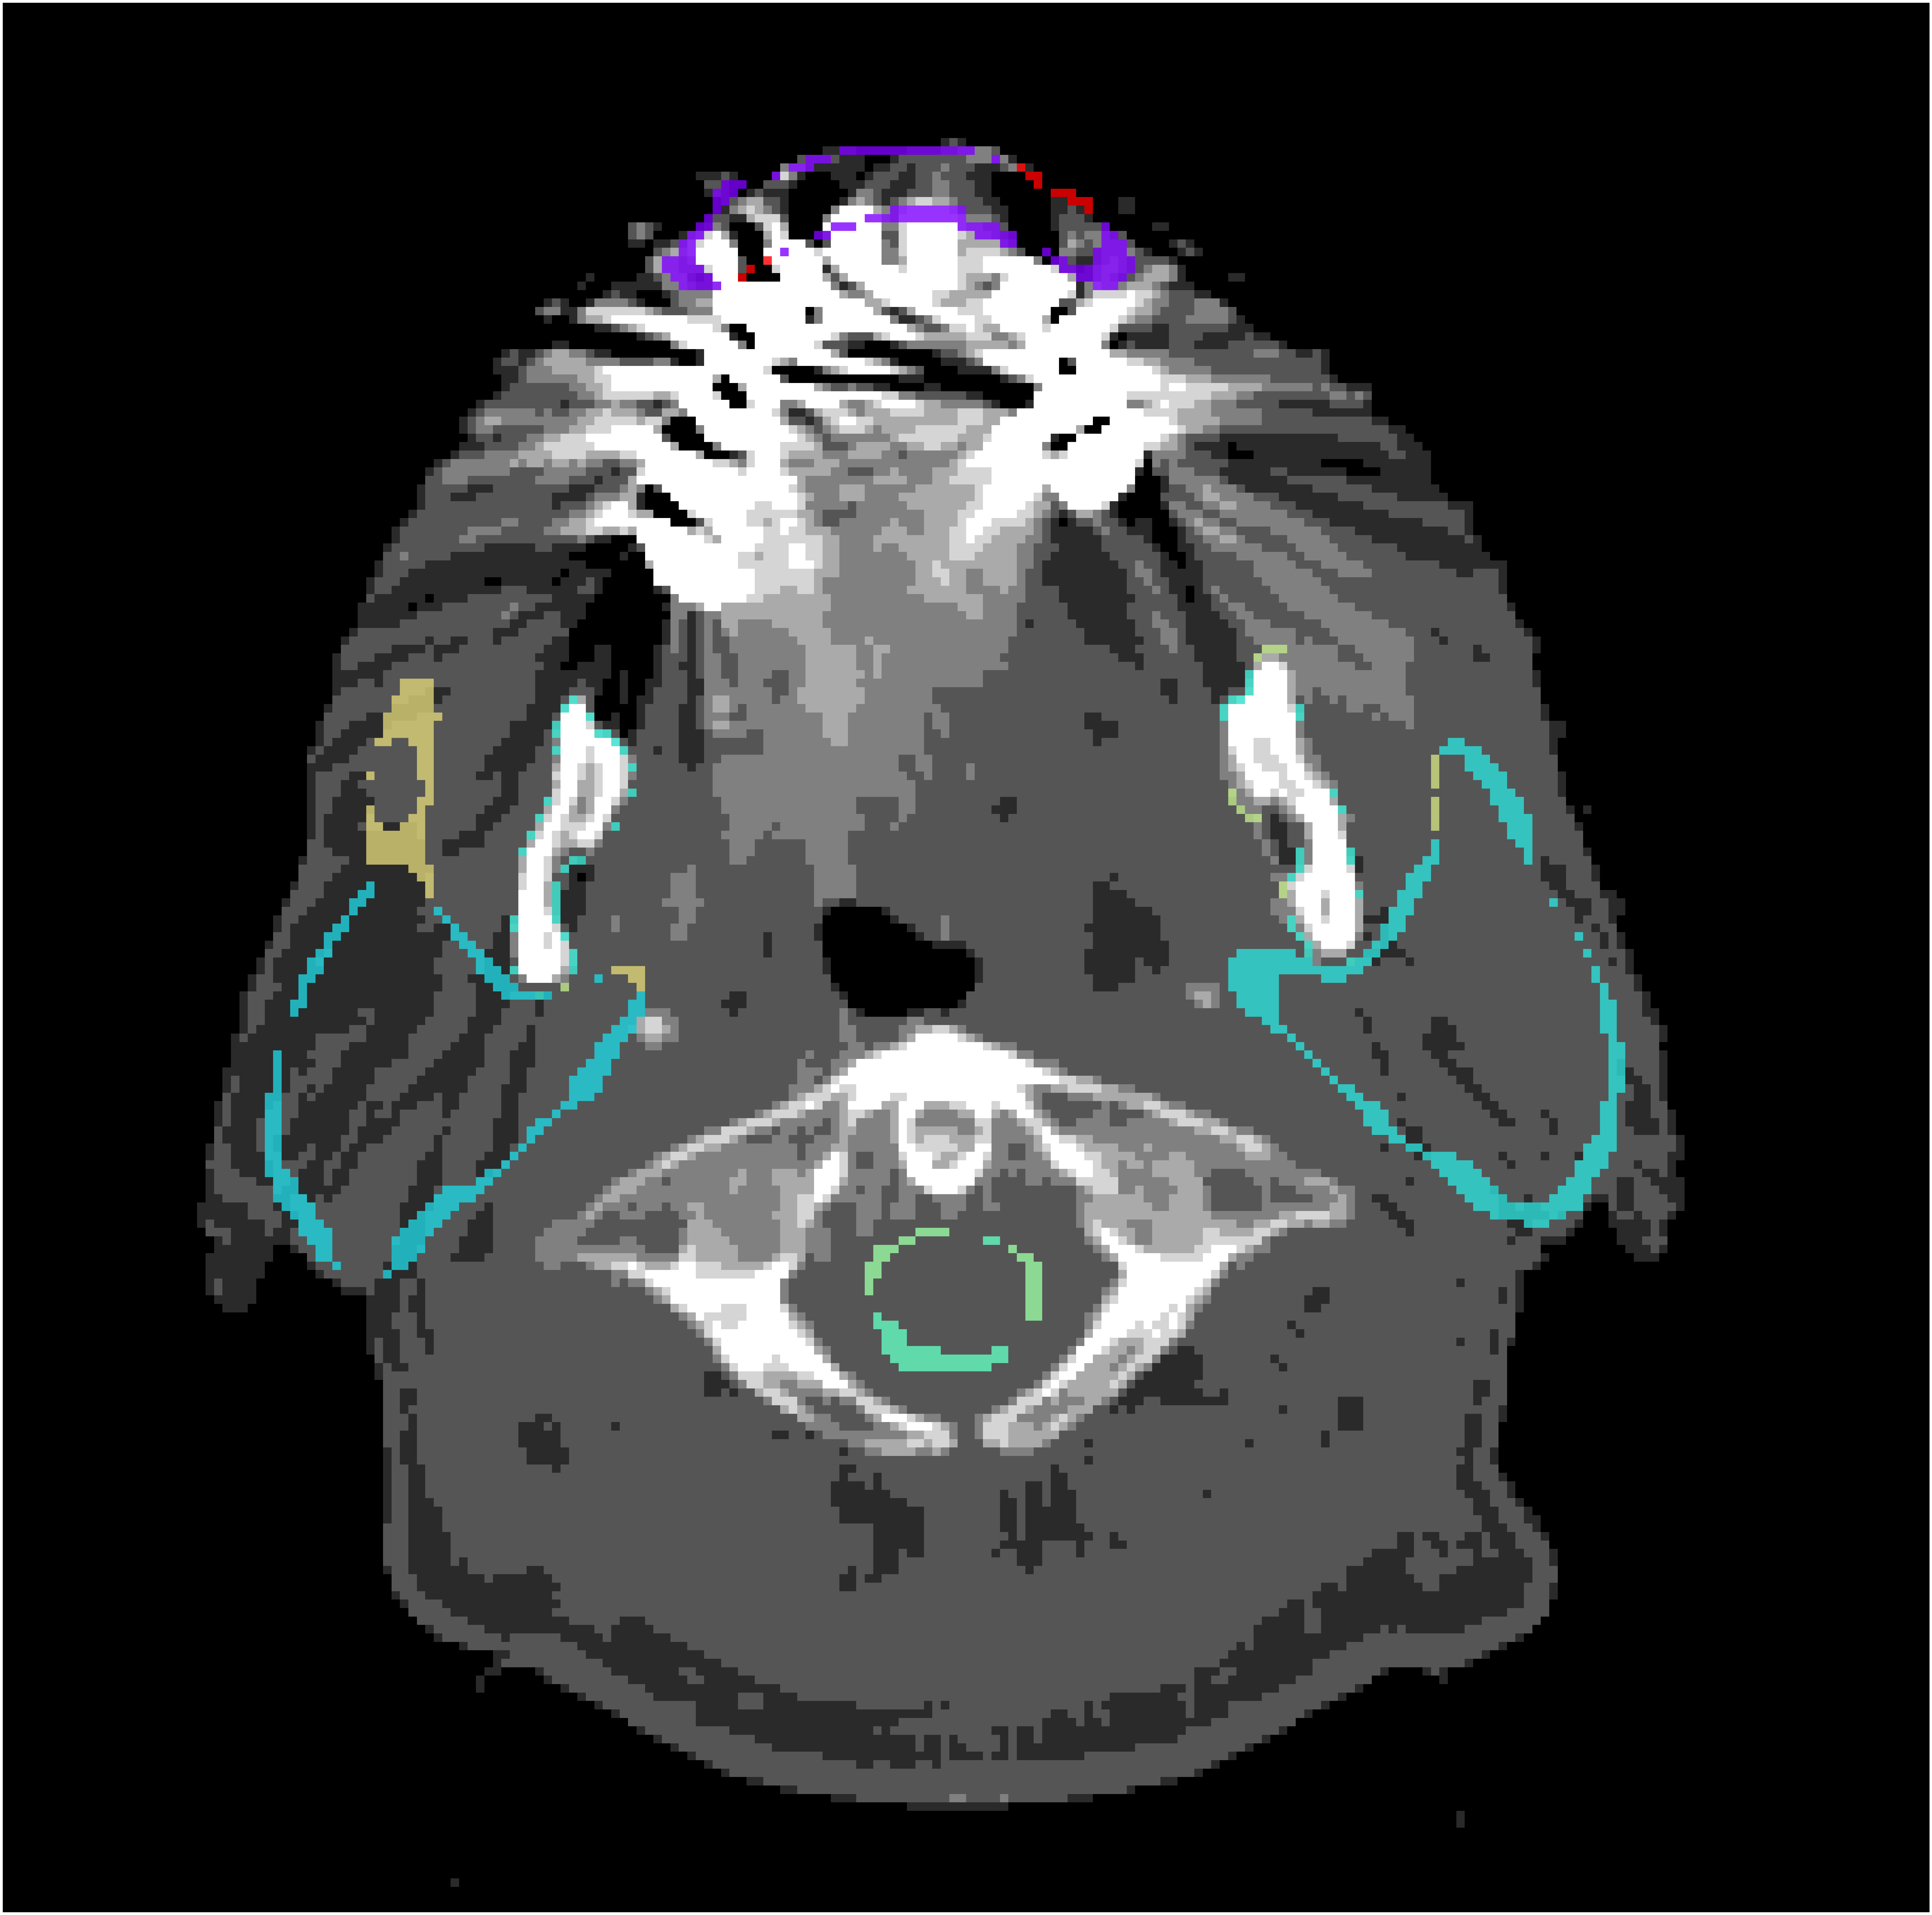

In [100]:
plt.figure(figsize=(100,90))
diff = np.round(targ_ - out_)
diffed = np.ma.masked_where(diff == 0, diff)
plt.imshow(np.round(slice_), cmap='gray', interpolation='none')
plt.imshow(diffed*4, alpha=0.8, cmap='rainbow', interpolation='none')
# ax3.set_title("Difference")
plt.axis('off')
plt.savefig(f'/Users/jmarsill/Downloads/radcure_ensemble_test/patient{6}_large_DIFFERENCE_view2.png', dpi=300)
# print(i)